In [1]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt


In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
Trans=pd.read_excel("KPMG.xlsx",sheet_name="Transactions")
Trans = Trans.loc[:, ~Trans.columns.str.contains('^Unnamed')]
Trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
# in ra info bảng
Trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# describe default
Trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [5]:
# describe các biến object
Trans.describe(include=[object])

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [6]:
#describe all
Trans.describe(include="all")


<ipython-input-6-6f4b1f8a030f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Trans.describe(include="all")


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-08-18 00:00:00,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,NaN,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,NaN,0.500013,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000


In [7]:
# count số dòng bị null ở mỗi cột
Trans.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [8]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all=Trans.dropna()
df_dropna_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [9]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = Trans.dropna(subset = ['online_order'])
df_dropna_online_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [10]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0=Trans.fillna(0)

In [11]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill=Trans.fillna(method="ffill")

In [12]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill=Trans.fillna(method="bfill")

## 1.3. Assess Categorial Data

In [13]:
# load sheet Demographic và hiển thị top head
Degra=pd.read_excel("KPMG.xlsx",sheet_name="CustomerDemographic")


In [14]:
# in ra info bảng 
Degra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [15]:
# describe các giá trị object
Degra.describe(include=[object])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Ramsdell,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [16]:
# Remove all NA row
Degra.dropna()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,á,No,10.0
3993,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,-100,No,12.0
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,á,Yes,14.0
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0


In [17]:
# In ra các giá trị unique của cột gender
Degra.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [18]:
# Quy chuẩn cột Gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
Degra["gender"]=Degra["gender"].replace(["M","F","U","Femal"],["Male","Female","Unisex","Female"])

In [19]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "Age" và in ra min age, max age
Degra.gender.unique()

array(['Female', 'Male', 'Unisex'], dtype=object)

In [20]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 36 - 55 là "Middle", trên 55 là Older
# lưu vào cột "Age_Group" bằng cách sử dụng hàm cut
Degra_DOB=Degra.dropna(subset=["DOB"])
import pandas as pd
from datetime import datetime
today = datetime.today()
Degra_DOB['age'] = Degra_DOB['DOB'].apply(
               lambda x: today.year - x.year - 
               ((today.month, today.day) < (x.month, x.day)) 
               )
bins=[0,36,55,110]
labels=["Young","Middle","Older"]
Degra_DOB["Age_Group"]=pd.cut(Degra_DOB["age"],bins=bins,labels=labels,right=True)
print('min age:', Degra_DOB['age'].min())
print('max age:', Degra_DOB['age'].max())

min age: 19
max age: 177


<ipython-input-20-7080a1c87463>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Degra_DOB['age'] = Degra_DOB['DOB'].apply(
<ipython-input-20-7080a1c87463>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Degra_DOB["Age_Group"]=pd.cut(Degra_DOB["age"],bins=bins,labels=labels,right=True)


# 2. Data Completeness

In [21]:
#join data sale vs demographic và in ra những trường hợp missing trong demographic

In [22]:
Trans_Degra=Trans.merge(Degra,how="left",on="customer_id")
Trans_Degra

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Male,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,testâ testâ«,No,22.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Male,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,â°â´âµâââ,No,16.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Female,29.0,1996-12-15,NaN,Retail,Affluent Customer,N,Ì¡ÍÍÌIÍÌÌÌ¦nÍÍÍvÌ®Ì«okÌ²Ì«ÌÍiÌÍÌ­Ì¹Ì ÌnÌ¡Ì»Ì®Ì...,Yes,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,...,Male,1.0,1994-11-27,Help Desk Operator,Manufacturing,Mass Customer,N,ÅâÂ´Â®â Â¥Â¨ËÃ¸Ïââ,Yes,7.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,...,Female,81.0,1974-12-03,Compensation Analyst,Financial Services,Mass Customer,N,../../../../../../../../../../../etc/passwd%00,No,19.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,...,Female,83.0,1974-02-16,Staff Accountant IV,Telecommunications,High Net Worth,N,"Ø«Ù ÙÙØ³ Ø³ÙØ·Øª ÙØ¨Ø§ÙØªØ­Ø¯ÙØ¯Ø, Ø¬Ø²ÙØ±ØªÙ ...",No,14.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,Female,12.0,1955-03-29,NaN,Financial Services,Mass Customer,N,â¦testâ§,Yes,20.0


In [23]:
Trans_Degra[Trans_Degra["first_name"].isna()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
8707,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16700,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17468,17469,0,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Aggregation

In [24]:
# tính tổng khách hàng bằng hàm nunique
Trans_Degra["first_name"].nunique()

2839

In [25]:
# Tính số khách khách hàng mỗi tháng
# hint 1: tạo collum year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
Total_customer_per_month=Trans_Degra.groupby(pd.Grouper(key='transaction_date', axis=0, 
                      freq='M'))["first_name"].nunique()
Total_customer_per_month

transaction_date
2017-01-31    1245
2017-02-28    1195
2017-03-31    1226
2017-04-30    1197
2017-05-31    1211
2017-06-30    1182
2017-07-31    1240
2017-08-31    1251
2017-09-30    1165
2017-10-31    1284
2017-11-30    1205
2017-12-31    1230
Freq: M, Name: first_name, dtype: int64

In [26]:
# Tính Gross magin của mỗi tháng. Gross magin = list_price - standard_cost
# hint 1: tạo collum Gross_Margin
# hint 2: group by year_month và sử dụng hàm agg
Trans_Degra["Gross_Margin"]=Trans_Degra["list_price"]-Trans_Degra["standard_cost"]
Gross_margin_per_month=Trans_Degra.groupby(pd.Grouper(key='transaction_date', axis=0, 
                      freq='M'))["Gross_Margin"].sum()
Gross_margin_per_month

transaction_date
2017-01-31    929487.739988
2017-02-28    870819.060000
2017-03-31    879243.400000
2017-04-30    904691.310000
2017-05-31    913742.610000
2017-06-30    859571.550000
2017-07-31    938619.290000
2017-08-31    970452.520000
2017-09-30    862290.490000
2017-10-31    984973.464984
2017-11-30    924938.460000
2017-12-31    891454.070000
Freq: M, Name: Gross_Margin, dtype: float64

In [27]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
sum_order_gross=Trans_Degra.groupby(["online_order","order_status"])["online_order","Gross_Margin"].agg(["sum"])
sum_order_gross

<ipython-input-27-1e3818e143de>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_order_gross=Trans_Degra.groupby(["online_order","order_status"])["online_order","Gross_Margin"].agg(["sum"])


online_order  Gross_Margin
                                   sum           sum
online_order order_status                           
0.0          Approved              0.0  5.344969e+06
             Cancelled             0.0  4.293074e+04
1.0          Approved           9732.0  5.287680e+06
             Cancelled            97.0  5.323673e+04

# 4. Data Visualization

In [28]:
# Sử dụng seaborn và vẽ ra 5 loại chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
import matplotlib.pyplot as plt
import seaborn as sns
Trans_Degra

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Gross_Margin
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,testâ testâ«,No,22.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,â°â´âµâââ,No,16.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,29.0,1996-12-15,NaN,Retail,Affluent Customer,N,Ì¡ÍÍÌIÍÌÌÌ¦nÍÍÍvÌ®Ì«okÌ²Ì«ÌÍiÌÍÌ­Ì¹Ì ÌnÌ¡Ì»Ì®Ì...,Yes,2.0,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,...,1.0,1994-11-27,Help Desk Operator,Manufacturing,Mass Customer,N,ÅâÂ´Â®â Â¥Â¨ËÃ¸Ïââ,Yes,7.0,802.26
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,...,81.0,1974-12-03,Compensation Analyst,Financial Services,Mass Customer,N,../../../../../../../../../../../etc/passwd%00,No,19.0,104.24
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,...,83.0,1974-02-16,Staff Accountant IV,Telecommunications,High Net Worth,N,"Ø«Ù ÙÙØ³ Ø³ÙØ·Øª ÙØ¨Ø§ÙØªØ­Ø¯ÙØ¯Ø, Ø¬Ø²ÙØ±ØªÙ ...",No,14.0,1592.19
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,12.0,1955-03-29,NaN,Financial Services,Mass Customer,N,â¦testâ§,Yes,20.0,91.15


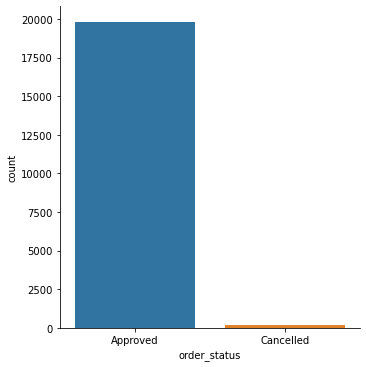

In [29]:
sns.catplot(x="order_status",data=Trans_Degra,kind="count")


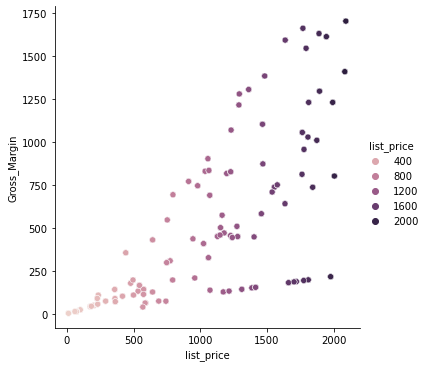

In [30]:
sns.relplot(x="list_price",y="Gross_Margin",data=Trans_Degra,kind="scatter",hue="list_price")

In [31]:
Total_customer_per_month_df=pd.DataFrame(Total_customer_per_month).rename(columns={"first_name":"Total"})
Total_customer_per_month_df=Total_customer_per_month_df.reset_index()
Total_customer_per_month_df

,transaction_date,Total
0,2017-01-31,1245
1,2017-02-28,1195
2,2017-03-31,1226
3,2017-04-30,1197
4,2017-05-31,1211
5,2017-06-30,1182
6,2017-07-31,1240
7,2017-08-31,1251
8,2017-09-30,1165
9,2017-10-31,1284


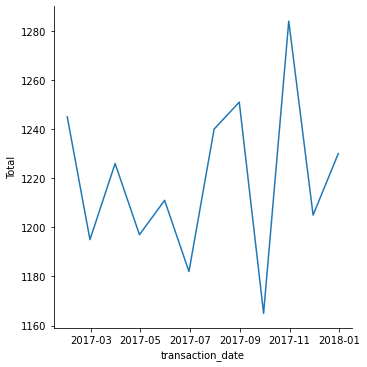

In [32]:
sns.relplot(x="transaction_date",y="Total",data=Total_customer_per_month_df,kind="line")

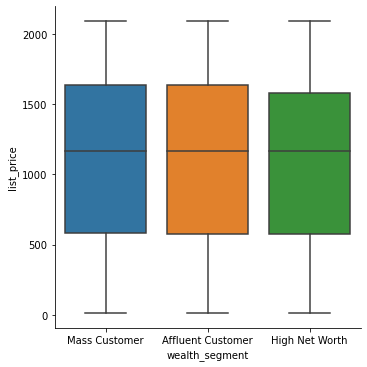

In [33]:
sns.catplot(x="wealth_segment",y="list_price",kind="box", data=Trans_Degra)

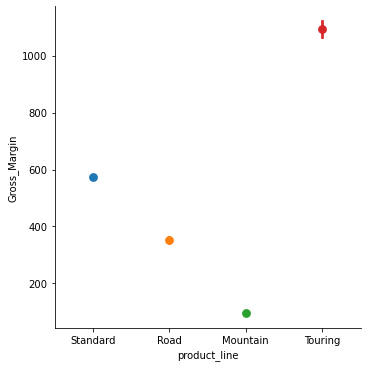

In [34]:
sns.catplot(x="product_line",y="Gross_Margin",kind="point", data=Trans_Degra,hue="product_line")